
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [1]:
#
# Import relevant Libraries
#
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)

Shape of training data: (60000, 784)
Shape of testing data: (10000, 784)


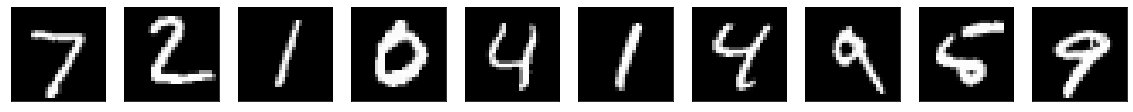

In [4]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [3]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)

Shape of training data: (60000, 784)
Shape of testing data: (10000, 784)


## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [11]:
#
# Add as many hidden layers in the encoder network of your choice
#
#

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the encoder
encoder = Sequential()

# Add the input layer (Flatten layer to flatten the input images)
encoder.add(Flatten(input_shape=[28,28]))

# Add hidden layers
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(32, activation='relu'))

In [12]:
# print the encoder model
print("Encoder Summary:")
encoder.summary()

Encoder Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.layers import Reshape

# Define the decoder
decoder = Sequential()

# Add the input layer
decoder.add(Dense(50, input_shape=[25], activation='relu'))

# Add hidden layers
# Add as many layers as you want, ensuring symmetry with the encoder
# For simplicity, let's add just one additional layer
decoder.add(Dense(100, activation='relu'))

# Add the output layer
decoder.add(Dense(28 * 28, activation='sigmoid'))  # Output layer with sigmoid activation to ensure pixel values are between 0 and 1

# Reshape the output to match the original image shape
decoder.add(Reshape((28, 28)))

In [19]:
# print the decoder model
print("Decoder Summary:")
decoder.summary()

Decoder Summary:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                1300      
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 784)               79184     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 85,584
Trainable params: 85,584
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [32]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [33]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
# Compile the autoencoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
# Fit the autoencoder
import numpy as np

# Reshape the input data to match the expected input shape of the autoencoder
x_train_reshaped = x_train.reshape(-1, 28, 28)
x_test_reshaped = x_test.reshape(-1, 28, 28)

# Fit the autoencoder
autoencoder.fit(x_train_reshaped, x_train_reshaped, epochs=5, validation_data=(x_test_reshaped, x_test_reshaped))

313/313 [==============================] - 2s 5ms/step


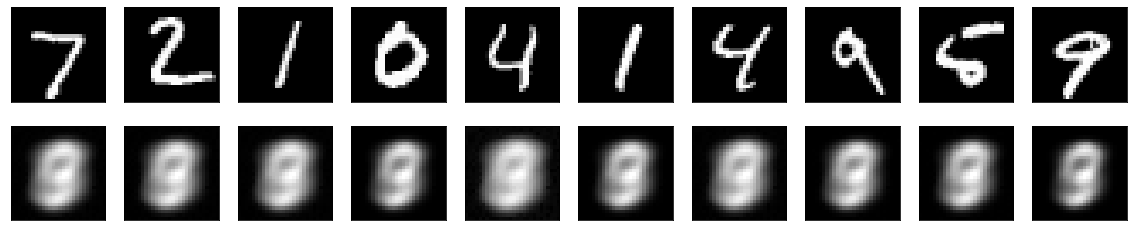

In [11]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [12]:
from tensorflow.keras.layers import GaussianNoise

In [13]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

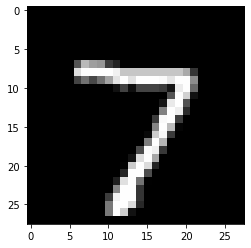

In [15]:
plt.imshow(x_test[0])

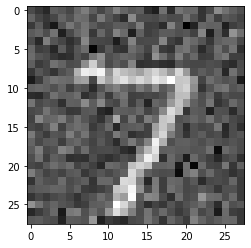

In [16]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [18]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#


In [19]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [20]:
noise_remover = Sequential([encoder, decoder])

In [38]:
# Compile the network as earlier
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Fit the network as earlier.
# Fit the autoencoder
autoencoder.fit(x_train_reshaped, x_train_reshaped, epochs=5, validation_data=(x_test_reshaped, x_test_reshaped))

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1714 - accuracy: 0.1781 - val_loss: 0.1352 - val_accuracy: 0.2249
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1307 - accuracy: 0.2354 - val_loss: 0.1238 - val_accuracy: 0.2376
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1193 - accuracy: 0.2484 - val_loss: 0.1148 - val_accuracy: 0.2484
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1138 - accuracy: 0.2567 - val_loss: 0.1121 - val_accuracy: 0.2565
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1107 - accuracy: 0.2614 - val_loss: 0.1093 - val_accuracy: 0.2523


In [23]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

In [ ]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.

In [42]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Input
from keras.models import Model

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the input layer
input_layer = Input(shape=(28, 28))

# Flatten the input images
flatten_layer = Flatten()(input_layer)

# Define the fully connected layer with 128 units
dense_layer = Dense(128, activation='relu')(flatten_layer)

# Define the output layer with 10 units for 10 classes
output_layer = Dense(10, activation='softmax')(dense_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Print the model summary
print(model.summary())

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4954 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3730 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3370 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8855
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8618
Test accuracy: 0.8618000149726868
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)            